In [60]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kstest, boxcox
%matplotlib inline

import math
import warnings

import itertools
from itertools import chain, combinations
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import copy
import time

pd.options.display.float_format = '{:,.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#### Build Database

In [61]:
# Build and load dataframe

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

### KNN Model

In [62]:
# Build our model.
X = pd.DataFrame(music.loudness)
Y = music.bpm
k_value = 6

# #Test splits
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0)

#### Intial, Unweighted KNN

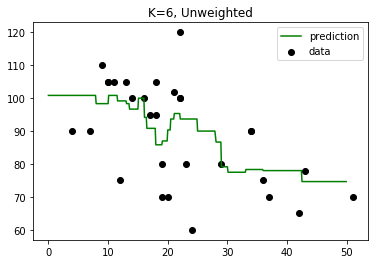

In [69]:
#Build Model
knn = neighbors.KNeighborsRegressor(n_neighbors=k_value)
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=6, Unweighted')
plt.show()

#### Normalize Data by Adding Scaler

In [89]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled_raw = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_raw)
music['X_scaled'] = X_scaled_raw

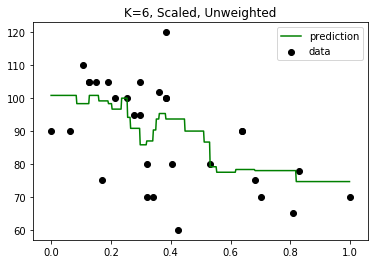

In [90]:
# Run the same model, this time with a normalized variable.
knn_scaled = neighbors.KNeighborsRegressor(n_neighbors=k_value)
knn_scaled.fit(X_scaled, Y)

# Set up our prediction line.
T_scaled = np.arange(0, 1, 0.002)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_scaled = knn_scaled.predict(T_scaled)

plt.scatter(X_scaled, Y, c='k', label='data')
plt.plot(T_scaled, Y_scaled, c='g', label='prediction')
plt.legend()
plt.title('K=6, Scaled, Unweighted')
plt.show()

#### Weighted, Raw KNN

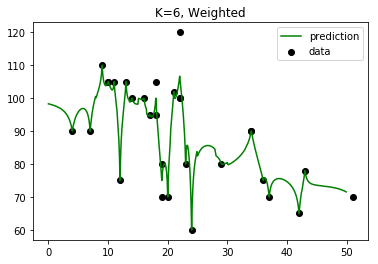

In [72]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=k_value, weights='distance')
knn_w.fit(X, Y)

Y_w = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_w, c='g', label='prediction')
plt.legend()
plt.title('K=6, Weighted')
plt.show()

#### Weighted, Scaled KNN

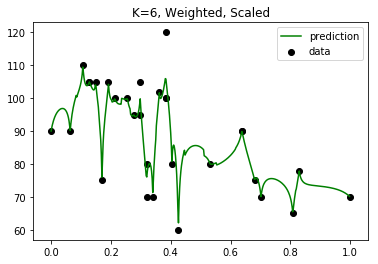

In [73]:
# Run the same model, this time with weights.
knn_w_scaled = neighbors.KNeighborsRegressor(n_neighbors=k_value, weights='distance')
knn_w_scaled.fit(X_scaled, Y)

Y_w_scaled = knn_w_scaled.predict(T_scaled)

plt.scatter(X_scaled, Y, c='k', label='data')
plt.plot(T_scaled, Y_w_scaled, c='g', label='prediction')
plt.legend()
plt.title('K=6, Weighted, Scaled')
plt.show()

#### Adding in Cross-Validation

In [74]:
#Intial, Unweighted Accuracy
score = cross_val_score(knn, X, Y, cv=2)
print("Initial, Unweighted Accuracy: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))

#Unweighted, Scaled Accuracy
score_scaled = cross_val_score(knn_scaled, X_scaled, Y, cv=2)
print("Unweighted, Scaled Accuracy: %0.3f (+/- %0.3f)" % (score_scaled.mean(), score_scaled.std() * 2))


#Weighted, Raw Accuracy
score_w = cross_val_score(knn_w, X, Y, cv=2)
print("Weighted, Raw Accuracy: %0.3f (+/- %0.3f)" % (score_w.mean(), score_w.std() * 2))

# Weighted, Scaled Accuracy
score_w_scaled = cross_val_score(knn_w, X_scaled, Y, cv=2)
print("Weighted, Scaled Accuracy: %0.3f (+/- %0.3f)" % (score_w_scaled.mean(), score_w_scaled.std() * 2))

Initial, Unweighted Accuracy: 0.262 (+/- 0.064)
Unweighted, Scaled Accuracy: 0.263 (+/- 0.064)
Weighted, Raw Accuracy: 0.370 (+/- 0.285)
Weighted, Scaled Accuracy: 0.371 (+/- 0.285)


### OLS Model

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


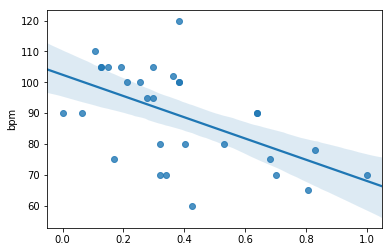

In [82]:
sns.regplot(X_scaled, music.bpm)

Coefficients
 Intercept   102.446
X_scaled    -34.431
dtype: float64 

P Values
 Intercept   0.000
X_scaled    0.002
dtype: float64 

R Squared
 0.30044845659472397 

Confidence Intervals
                 0       1
Intercept  93.252 111.641
X_scaled  -54.769 -14.093


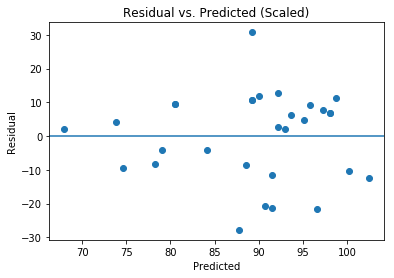

In [85]:
lm = smf.ols(formula = "bpm ~ X_scaled", data = music).fit()

print('Coefficients\n',lm.params,'\n')
print('P Values\n',lm.pvalues,'\n')
print('R Squared\n',lm.rsquared,'\n')
print('Confidence Intervals\n',lm.conf_int())

resid = lm.resid
plt.scatter(lm.predict(), resid)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted (Scaled)')
plt.show()

In [86]:
print(lm.summary())
elem1res = pd.concat([music, pd.Series(lm.resid, name = 'resid'), pd.Series(lm.predict(), name = "predict")], axis = 1)

                            OLS Regression Results                            
Dep. Variable:                    bpm   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     12.03
Date:                Mon, 26 Nov 2018   Prob (F-statistic):            0.00171
Time:                        08:19:10   Log-Likelihood:                -119.05
No. Observations:                  30   AIC:                             242.1
Df Residuals:                      28   BIC:                             244.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.4464      4.489     22.823      0.0

### Comparison

Seems that the OLS model has a lower accuracy or R squared compared to the KNN Regression model.